<a href="https://colab.research.google.com/github/tselane2110/Forecasting-Sticker-Sales/blob/main/StickerSalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s5e1_path = kagglehub.competition_download('playground-series-s5e1')

print('Data source import complete.')


100%|██████████| 2.26M/2.26M [00:00<00:00, 124MB/s]

Extracting files...
Data source import complete.


In [3]:
print(playground_series_s5e1_path)

/root/.cache/kagglehub/competitions/playground-series-s5e1


## 1. Importing required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
# getting the path to the files

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/competitions/playground-series-s5e1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/root/.cache/kagglehub/competitions/playground-series-s5e1/train.csv
/root/.cache/kagglehub/competitions/playground-series-s5e1/test.csv
/root/.cache/kagglehub/competitions/playground-series-s5e1/sample_submission.csv


## 2. Importing Dataset

In [6]:
df = pd.read_csv("/root/.cache/kagglehub/competitions/playground-series-s5e1/train.csv")
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


## 3. Understanding Data

In [7]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [8]:
df.dtypes

,0
id,int64
date,object
country,object
store,object
product,object
num_sold,float64


In [9]:
df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [10]:
221259/230130

0.9614522226567592

In [11]:
len(df['date'].unique())

2557

In [12]:
2557/365

7.005479452054795

In [13]:
df['country'].unique()

array(['Canada', 'Finland', 'Italy', 'Kenya', 'Norway', 'Singapore'],
      dtype=object)

In [14]:
df['product'].unique()

array(['Holographic Goose', 'Kaggle', 'Kaggle Tiers', 'Kerneler',
       'Kerneler Dark Mode'], dtype=object)

In [15]:
df['store'].unique()

array(['Discount Stickers', 'Stickers for Less', 'Premium Sticker Mart'],
      dtype=object)

In [16]:
len(df['num_sold'].unique())

4038

## 3.1 Understanding Data (Summary)

Our data has 6 columns (id, date, country, product, store, num_sold). We realized that:
1. The `id` column is not required, hence, we will delete it during the **data-cleaning** phase.
2. The <u>datatype</u> of the `date` column is "object" which we will change it to "datetime" during the **data-cleaning** phase.

### About `date`:
We checked the total **unique** values in our date column which turned out to be 2557. Assuming that every-year has 365 days, we divided 2557 by 365 and got 7.005 as an answer. This means that we have about around 7 years of data. However, we will still have to fact-check by understanding our data more during the **data-cleaning** phase.

### About the Variance in the data:
Since the target-column is `num_sold`, we checked the **mean** and **standard-deviation** of this column to understand the distribution of the data. The mean we got is 752.527 whereas the standard-deviation (std) is around 690.165. The minimum value in the `num_sold` is 5 whereas the maximum is 5939. This might mean that our data has high-variance (not too high but still high) and there might be some outliers (some stores might be selling some products more than the other stores) which we will further explore in the **data-cleaning** phase.

### About missing values
We saw that the total number of rows in the dataset are 230130 whereas the total number of "present values" in the `num_sold` column is 221259. This implies that (for `num_sold` column) 4% of the data is missing. However, we will further explore the missing values of all columns in the **data-cleaning** phase.

## 4. Data Cleaning

In [17]:
# fixing the datatype of the 'date' column
df['date'] = pd.to_datetime(df['date'])

In [18]:
df.dtypes

,0
id,int64
date,datetime64[ns]
country,object
store,object
product,object
num_sold,float64


In [19]:
df['date'][0]

Timestamp('2010-01-01 00:00:00')

In [20]:
df.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold'], dtype='object')

In [21]:
# looking for the count of missing values in each column
date = df['date'].isna().sum()
country = df['country'].isna().sum()
store = df['store'].isna().sum()
product = df['product'].isna().sum()
sales = df['num_sold'].isna().sum()

print(f"""Missing Values for all columns are:\n
          For date column: {date}\n
          For country column: {country}\n
          For store column: {store}\n
          For product column: {product}\n
          For num_sold column: {sales}""")

Missing Values for all columns are:

          For date column: 0

          For country column: 0

          For store column: 0

          For product column: 0

          For num_sold column: 8871


In [22]:
len(df['num_sold'])

230130

In [23]:
len(df['num_sold'][df['country'] == "Kenya"])

38355

In [24]:
len(df["num_sold"][(df["country"] == "Kenya") & (df["num_sold"].isna())])

4625

In [25]:
4625/38355

0.12058401772910964

In [26]:
len(df['num_sold'][df['country'] == "Canada"])

38355

In [27]:
len(df['num_sold'][(df['country'] == "Canada") & (df['num_sold'].isna())])

4246

In [28]:
4246/38355

0.11070264633033502

In [29]:
df = df.dropna(subset=["num_sold"])
print(df.isna().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


In [30]:
df

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [31]:
# looking for duplicate rows
print(f"We have {df.duplicated().sum()} duplicate rows in our dataset.")

We have 0 duplicate rows in our dataset.


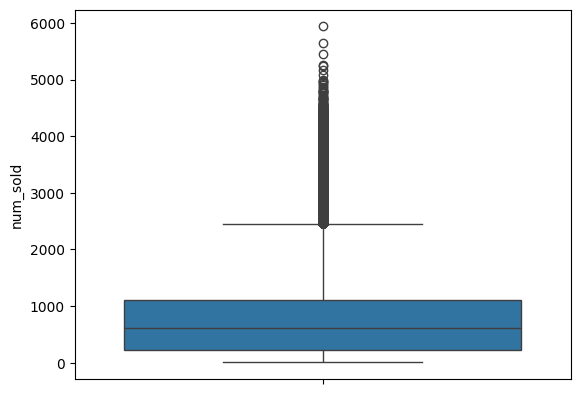

In [32]:
# looking for outliers

sns.boxplot(data=df, y="num_sold")
plt.show()

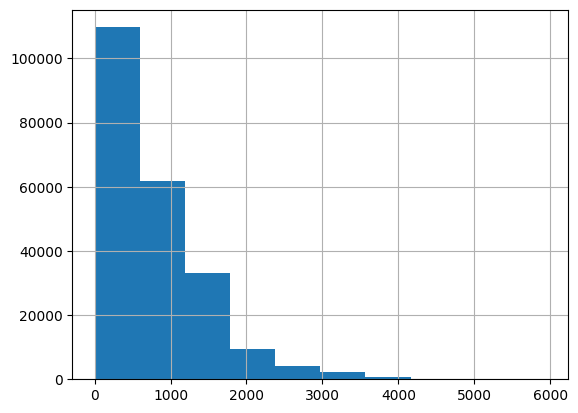

In [33]:
df["num_sold"].hist()
plt.show()

In [34]:
# exploring the outliers

outliers = df[df['num_sold']>=2500]
print(len(outliers))
outliers

6264


,id,date,country,store,product,num_sold
66,66,2010-01-01,Norway,Stickers for Less,Kaggle,3369.0
67,67,2010-01-01,Norway,Stickers for Less,Kaggle Tiers,3195.0
71,71,2010-01-01,Norway,Premium Sticker Mart,Kaggle,3940.0
72,72,2010-01-01,Norway,Premium Sticker Mart,Kaggle Tiers,3430.0
156,156,2010-01-02,Norway,Stickers for Less,Kaggle,3545.0
...,...,...,...,...,...,...
230036,230036,2016-12-30,Singapore,Premium Sticker Mart,Kaggle,2822.0
230106,230106,2016-12-31,Norway,Stickers for Less,Kaggle,2767.0
230111,230111,2016-12-31,Norway,Premium Sticker Mart,Kaggle,3459.0
230112,230112,2016-12-31,Norway,Premium Sticker Mart,Kaggle Tiers,2735.0


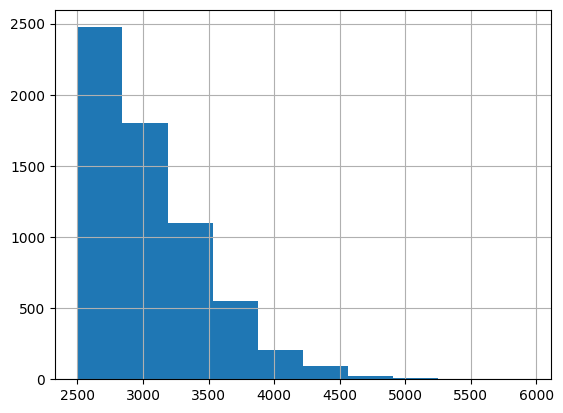

In [35]:
outliers["num_sold"].hist()
plt.show()

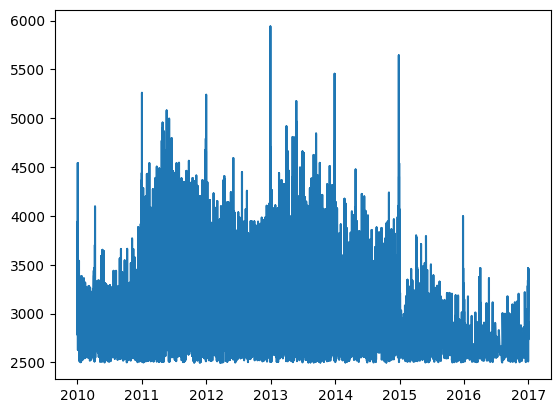

In [36]:
plt.plot(outliers['date'], outliers['num_sold'])

In [37]:
new_outliers = outliers
# Basic Time Features
new_outliers['year'] = new_outliers['date'].dt.year
new_outliers['month'] = new_outliers['date'].dt.month  # 1-12
new_outliers['day'] = new_outliers['date'].dt.day
new_outliers['day_of_week'] = new_outliers['date'].dt.dayofweek  # Monday=0, Sunday=6
new_outliers['day_name'] = new_outliers['date'].dt.day_name()  # Monday, Tuesday, etc.
new_outliers['week_of_year'] = new_outliers['date'].dt.isocalendar().week  # 1-52

# Advanced Features
new_outliers['quarter'] = new_outliers['date'].dt.quarter  # 1-4
new_outliers['is_weekend'] = new_outliers['day_of_week'].isin([5, 6]).astype(int)  # 1 if Sat/Sun, else 0
new_outliers['is_month_start'] = new_outliers['date'].dt.is_month_start.astype(int)  # 1 if first day of month
new_outliers['is_month_end'] = new_outliers['date'].dt.is_month_end.astype(int)  # 1 if last day of month

# Derived Features
new_outliers['week_of_month'] = new_outliers['date'].apply(lambda x: (x.day - 1) // 7 + 1)  # 1st, 2nd, 3rd, etc., week in month
new_outliers['days_in_month'] = new_outliers['date'].dt.days_in_month  # Total days in the month
new_outliers['is_leap_year'] = new_outliers['date'].dt.is_leap_year.astype(int)  # 1 if leap year, else 0


<ipython-input-37-104af5edadc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_outliers['year'] = new_outliers['date'].dt.year
<ipython-input-37-104af5edadc4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_outliers['month'] = new_outliers['date'].dt.month  # 1-12
<ipython-input-37-104af5edadc4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [38]:
new_outliers.columns

Index(['id', 'date', 'country', 'store', 'product', 'num_sold', 'year',
       'month', 'day', 'day_of_week', 'day_name', 'week_of_year', 'quarter',
       'is_weekend', 'is_month_start', 'is_month_end', 'week_of_month',
       'days_in_month', 'is_leap_year'],
      dtype='object')

In [39]:
years = new_outliers['year'].unique()
print(years)

[2010 2011 2012 2013 2014 2015 2016]


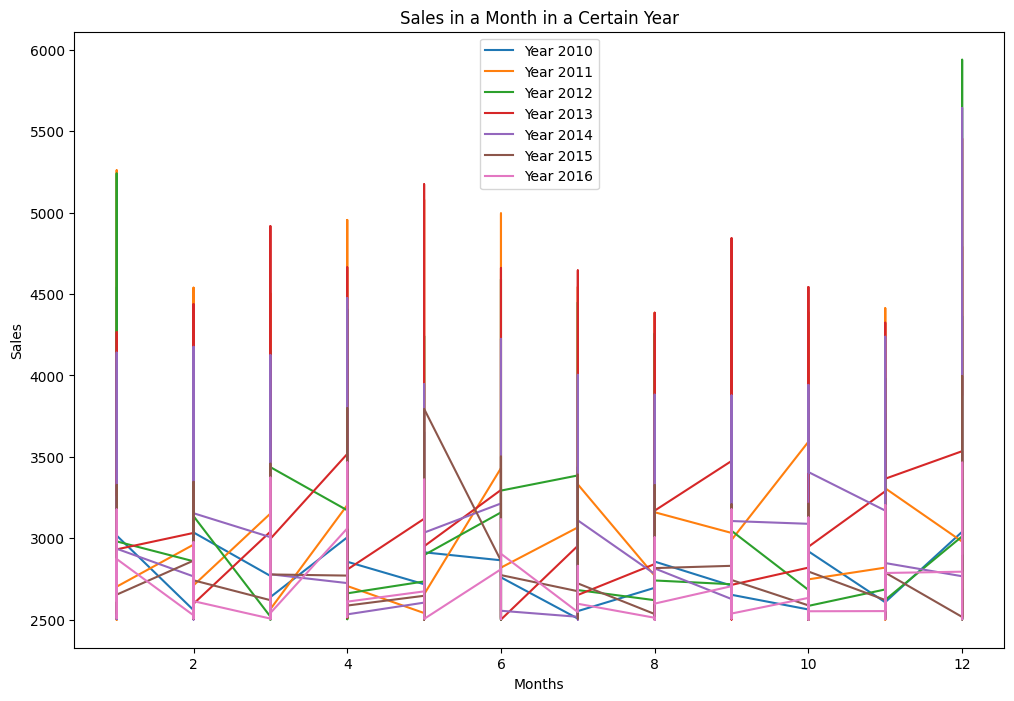

In [68]:
# checking wrt months in a certain year
plt.figure(figsize=(12, 8))
for i in years:
  x = new_outliers[new_outliers.year == i]['month']
  y = new_outliers[new_outliers.year == i]['num_sold']
  plt.plot(x, y, label=f'Year {i}')
plt.legend()
plt.xlabel("Months")
plt.ylabel("Sales")
plt.title("Sales in a Month in a Certain Year")
plt.show()

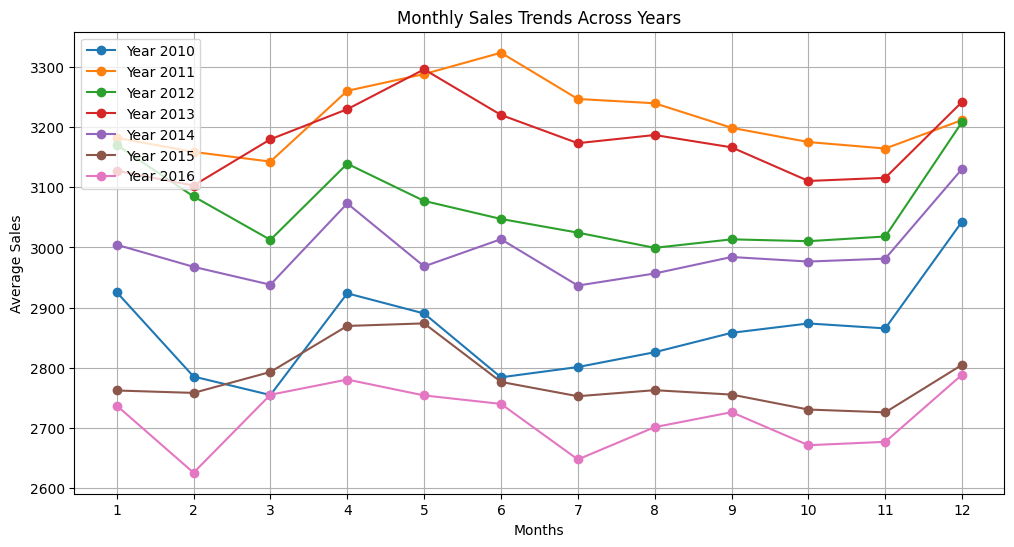

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Ensure data is sorted
for year in sorted(new_outliers['year'].unique()):
    df_year = new_outliers[new_outliers['year'] == year].groupby('month', as_index=False)['num_sold'].mean()
    plt.plot(df_year['month'], df_year['num_sold'], marker='o', linestyle='-', label=f'Year {year}')

plt.legend(loc='upper left')  # Moves legend to the upper left
plt.xlabel("Months")
plt.ylabel("Average Sales")
plt.title("Monthly Sales Trends Across Years")
plt.xticks(range(1, 13))  # Ensure x-axis shows 1 to 12 for months
plt.grid(True)
plt.show()
